# Data Transformations

* __Author: Prof. Nagiza F. Samatova__
* __Email: samatova@csc.ncsu.edu__
* __Date: September 25, 2018__

## Loading Relevant Packages

### Run the following in the terminal if not installed:
> ```python
pip3 install <package-name>
```

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import math

import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats.kde import gaussian_kde
import sklearn

import scipy
import pylab 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Family of Powers, Inverse Powers, and Roots

+ $p <= -1$: inverse power
+ $-1 < p < 1$: root
+ $p > 1$: power

The values must be ___positive___, because negative values give nonmonotone transformation.

Let’s create a vector of $x$-coordinates:

In [2]:
x=np.arange(0.01, 4, 0.01)
x[0:5]

array([0.01, 0.02, 0.03, 0.04, 0.05])

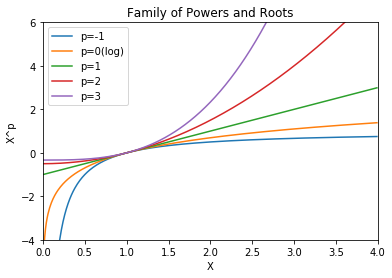

In [3]:
plt.plot(x,(np.power(x,-1)-1)/(-1),label="p=-1")
plt.plot(x,np.log(x),label="p=0(log)")
plt.plot(x,(x-1)/1,label="p=1")
plt.plot(x,(np.power(x,2)-1)/2,label="p=2")
plt.plot(x,(np.power(x,3)-1)/3,label="p=3")
plt.xlim(0,4)
plt.ylim(-4,6)
plt.xlabel("X")
plt.ylabel("X^p")
plt.title("Family of Powers and Roots")
plt.legend()
plt.show()

### Negative Values: Use Positive Start

If the values of the variable are negative then power transformations become non-monotone. To overcome this problem, use positive start, as illustrated below:

In [4]:
x=np.arange(-2, 2, 0.01)
x[0:5]

array([-2.  , -1.99, -1.98, -1.97, -1.96])

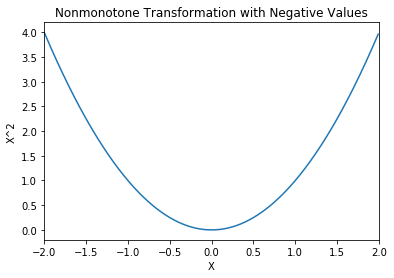

In [5]:
plt.plot(x,np.power(x,2))
plt.xlim(-2,2)
plt.xlabel("X")
plt.ylabel("X^2")
plt.title("Nonmonotone Transformation with Negative Values")
plt.show()

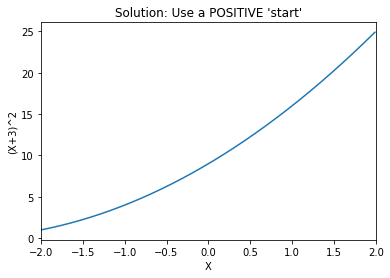

In [6]:
# Solution: use a positive start
plt.plot(x,np.power(x+3,2))
plt.xlim(-2,2)
plt.xlabel("X")
plt.ylabel("(X+3)^2")
plt.title("Solution: Use a POSITIVE 'start'")
plt.show()

### Ineffective Power Transformation: Use Negative Start

If _the ratio of the largest to the smallest values is less than 5_, then use a negative start:

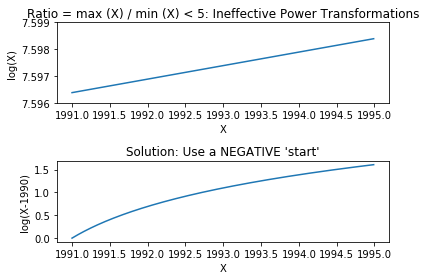

In [7]:
x=np.arange(1991, 1995, 0.01)
plt.subplot(2, 1, 1)
plt.plot(x,np.log(x))
plt.xlabel("X")
plt.ylabel("log(X)")
plt.ylim(7.596,7.599)
plt.title("Ratio = max (X) / min (X) < 5: Ineffective Power Transformations")

plt.subplot(2, 1, 2)
plt.plot(x,np.log(x-1990))
plt.xlabel("X")
plt.ylabel("log(X-1990)")
plt.title("Solution: Use a NEGATIVE 'start'")

plt.tight_layout()
plt.show()


### Log Transformations

Data values varying by several orders of magnitude may lead to unstable model fits or make patterns difficult to visualize:
- E.g., income, sales, account sizes, etc.
- Log transformation can reduce the effect of large values, and make certain trends more apparent

This code reads in data from a dataset and examines histograms on an untransformed scale and after a log transformation. As you can see, the log transformation has generated symmetry and peakedness in the histogram.

In [8]:
df = pd.read_csv("../data_raw/data_prep_nonlinear_transform_WebServer.csv", skiprows=21)
df.head(3)

,Month,Total,Apache,Google,lighttpd,Microsoft,NGINX,Sun/SunONE,Zeus,qq.com
0,3-Feb,35863952,22492327,0.0,0.0,9687454,0.0,428004.0,768951.0,NaN
1,3-Mar,39174349,24486857,0.0,0.0,10748795,0.0,419120.0,794940.0,NaN
2,3-Apr,40100739,25090844,0.0,0.0,11007434,0.0,415999.0,789324.0,NaN


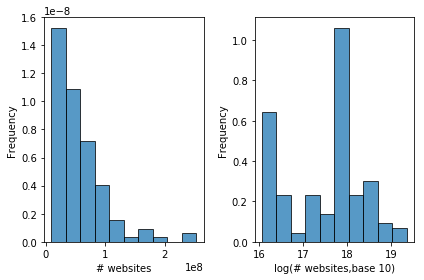

In [9]:
plt.subplot(1, 2, 1)
plt.hist(df.Microsoft, 10, normed=1, edgecolor='black', alpha=0.75)
plt.xlabel("# websites")
plt.ylabel("Frequency")

plt.subplot(1,2, 2)
plt.hist(np.log(df.Microsoft), 10, normed=1, edgecolor='black', alpha=0.75)
plt.xlabel("log(# websites,base 10)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## Transforming Positively Skewed Distributions

In [10]:
prestige = pd.read_csv("../data_raw/data_prep_nonlinear_transform_prestige.csv")
prestige['income'].describe()

count      102.000000
mean      6797.901961
std       4245.922227
min        611.000000
25%       4106.000000
50%       5930.500000
75%       8187.250000
max      25879.000000
Name: income, dtype: float64

### Log 10 Transformation

In [46]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html

In [11]:
log_income = prestige.income.apply(np.log10)

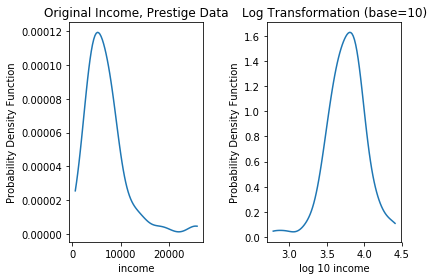

In [12]:
plt.subplot(1,2,1)
data = prestige.income

# this creates the kernel, given an array,
# it will estimate the probability over that values
# http://slendermeans.org/ml4h-ch2-p1.html
kde = gaussian_kde( data )
# these are the values over which your kernel will be evaluated
dist_space = np.linspace( min(data), max(data), 100 )

# plot the results
plt.plot( dist_space, kde(dist_space) )
plt.xlabel("income")
plt.ylabel("Probability Density Function")
plt.title("Original Income, Prestige Data")


plt.subplot(1,2,2)
data = log_income
# this create the kernel, given an array, 
# it will estimate the probability over that values
kde = gaussian_kde( data )
# these are the values over which your kernel will be evaluated
dist_space = np.linspace( min(data), max(data), 100 )
# plot the results
plt.plot( dist_space, kde(dist_space) )
plt.xlabel("log 10 income")
plt.ylabel("Probability Density Function")
plt.title("Log Transformation (base=10)")

plt.tight_layout()
plt.show()

ORIGINAL INCOME, PRESTIGE DATA


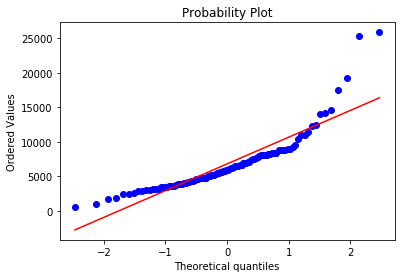

LOG TRANSFORMATION (BASE=10)


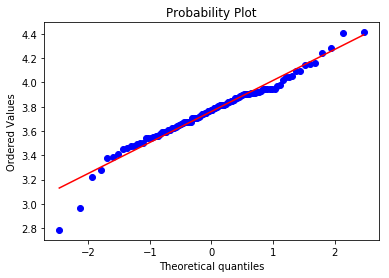

In [13]:
print("ORIGINAL INCOME, PRESTIGE DATA")
measurements = prestige.income
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

print("LOG TRANSFORMATION (BASE=10)")
measurements = log_income
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()


### Descend the Ladder of Powers: $p < 1$

- Right skew (positive skew)
- Need to compress large values
- Descend the ladder of powers
- Use $p < 1$

In [14]:
p=0.2
p_income= np.power(prestige.income,p)

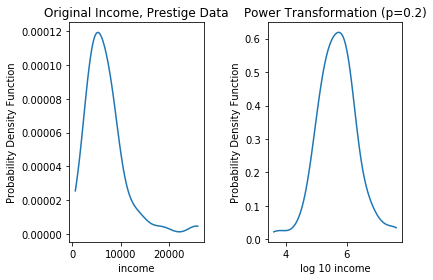

In [15]:
plt.subplot(1,2,1)
data = prestige.income
# this creates the kernel, given an array,
# it will estimate the probability over that values
kde = gaussian_kde( data )
# these are the values over which the kernel will be evaluated
dist_space = np.linspace( min(data), max(data), 100 )
# plot the results
plt.plot( dist_space, kde(dist_space) )
plt.xlabel("income")
plt.ylabel("Probability Density Function")
plt.title("Original Income, Prestige Data")


plt.subplot(1,2,2)
data = p_income
# this creates the kernel, 
# given an array, it will estimate the probability over that values
kde = gaussian_kde( data )
# these are the values over which your kernel will be evaluated
dist_space = np.linspace( min(data), max(data), 100 )
# plot the results
plt.plot( dist_space, kde(dist_space) )
plt.xlabel("log 10 income")
plt.ylabel("Probability Density Function")
plt.title("Power Transformation (p=0.2)")

plt.tight_layout()
plt.show()

ORIGINAL INCOME, PRESTIGE DATA


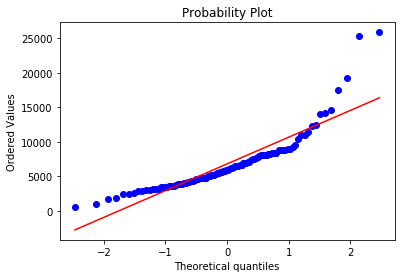

POWER TRANSFORMATION (p=0.2)


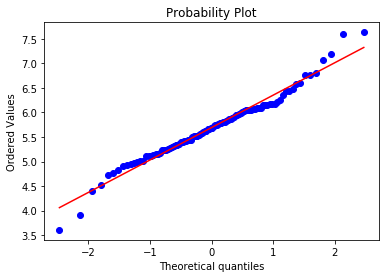

In [16]:
print("ORIGINAL INCOME, PRESTIGE DATA")
measurements = prestige.income
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

print("POWER TRANSFORMATION (p=0.2)")
measurements = p_income
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

# Transforming Nonlinearity: The Bulging Rule

If the relationship between $X$ and $Y$ is non-linear, then apply the __Bulging Rule__ for straightening the relationship by transformation $X^p$ and/or $Y^q$, or both after making both positive and after visualizing their scatter plot:

- 1st quadrant of a circle-like data shape 
    - go up-ladder for $X$, $Y$, or both
    - $p>1$, $q>1$

- 2nd quadrant of a circle-like data shape 
    - go down-ladder for $X$, and/or
    - go up-ladder for $Y$
    - $p<1$, $q>1$
    
- 3rd quadrant of a circle-like data shape 
    - go dwn-ladder for $X$, $Y$, or both
    - $p<1$, $q<1$

- 4th quadrant of a circle-like data shape 
    - go up-ladder for $X$, and/or
    - go down-ladder for $Y$
    - $p>1$, $q<1$

In [17]:
#leinhardt = sm.datasets.get_rdataset("Leinhardt", "car").data
leinhardt = pd.read_csv("../data_raw/data_prep_nonlinear_transform_leinhardt.csv")

In [18]:
leinhardt.describe()

,income,infant
count,105.000000,101.000000
mean,998.066667,89.047525
std,1416.714294,90.801707
min,50.000000,9.600000
25%,123.000000,26.200000
50%,334.000000,60.600000
75%,1191.000000,129.400000
max,5596.000000,650.000000


Remove observations with missing values using `.dropna()` method and keep only the rows for which infant mortality is not missing:

In [19]:
cleaned = leinhardt.dropna(subset = ['infant'])

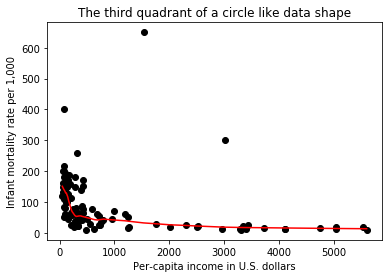

In [20]:
plt.plot(cleaned.income,cleaned.infant, 'ko')
plt.title("The third quadrant of a circle like data shape")
plt.xlabel("Per-capita income in U.S. dollars")
plt.ylabel("Infant mortality rate per 1,000")
lowess = sm.nonparametric.lowess(cleaned.infant, cleaned.income, frac=.3)
x=list(zip(*lowess))[0]
y=list(zip(*lowess))[1]
plt.plot(x,y,color='r')
plt.show()

In [21]:
p=0.125
q=0.125

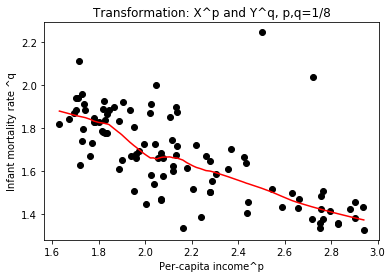

In [22]:
plt.plot(np.power(cleaned.income,p),np.power(cleaned.infant,q), 'ko')
plt.title("Transformation: X^p and Y^q, p,q=1/8")
plt.xlabel("Per-capita income^p")
plt.ylabel("Infant mortality rate ^q")
lowess = sm.nonparametric.lowess(np.power(cleaned.infant,q), np.power(cleaned.income,p), frac=.3)
x=list(zip(*lowess))[0]
y=list(zip(*lowess))[1]
plt.plot(x,y,color='r')
plt.show()

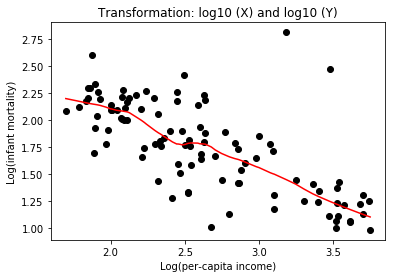

In [23]:
plt.plot(np.log10(cleaned.income),np.log10(cleaned.infant), 'ko')
plt.title("Transformation: log10 (X) and log10 (Y)")
plt.xlabel("Log(per-capita income)")
plt.ylabel("Log(infant mortality)")
lowess = sm.nonparametric.lowess(np.log10(cleaned.infant), np.log10(cleaned.income), frac=.3)
x=list(zip(*lowess))[0]
y=list(zip(*lowess))[1]
plt.plot(x,y,color='r')
plt.show()

### Linear Fit after Nonlinear Transformation

Let’s fit a linear model to the transformed data using LinearRegression() function:
 - A linear model fits well after transformation (blue dashed regression line)
 - Since both variables are transformed by the log10, the coefficients are easy to interpret: 
    - An increase in income by 1% is associated, on average, with a .51% decrease in infant mortality

In [24]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
x=np.log10(cleaned.income).values.reshape(-1,1)
y=np.log10(cleaned.infant).values.reshape(-1,1)

In [26]:
lm.fit(x,y)
print(lm.coef_)
print(lm.intercept_)
lm

[[-0.51179426]]
[3.10339176]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

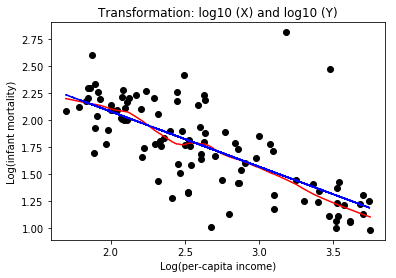

In [27]:
plt.plot(np.log10(cleaned.income),np.log10(cleaned.infant), 'ko')
plt.title("Transformation: log10 (X) and log10 (Y)")
plt.xlabel("Log(per-capita income)")
plt.ylabel("Log(infant mortality)")
lowess = sm.nonparametric.lowess(np.log10(cleaned.infant), np.log10(cleaned.income), frac=.3)
plt.plot(list(zip(*lowess))[0],list(zip(*lowess))[1],color='r')
plt.plot(x,lm.predict(x),'b--')
plt.show()

## Transforming Non-constant Spread

See the details in the Box-Cox Transformation.
 - Differences in spread are often related to differences in level.
 - Often: higher level is associated with a higher spread
 - When spread is positively related to level: 
    - we need to compress large values
    - transformation down the ladder of powers and roots: $p < 1$
 - When spread is negatively related to level (rare): 
    - we need to spread out large values
    - transformation up the ladder of powers and roots: $p > 1$

## Power Transformation for Normality

Transforming data to a normal distribution involves using a power transformation, 
$x -> (x^λ-1)/λ$:
+ The function takes in data (and possibly covariates) and 
+ Finds the best $λ$ to cause $X$ to be approximately normal. 
+ The `boxcox()` function takes in $X$ and a $λ$ and just applies the power transform function to the data, which is then examined as a histogram. 
    * If $λ$  is not provided, it finds the $λ$ that maximizes the log-likelyhood function.
    * It is returned as the second output argument

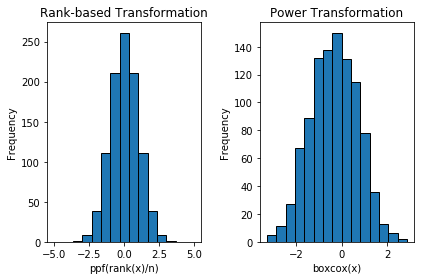

In [28]:
n=1000
np.random.seed(2018)
x=np.random.exponential(size=n)

plt.subplot(1,2,1)
plt.hist(stats.norm.ppf(stats.rankdata(x)/n),bins=15,range=(-5,5),edgecolor='black')
plt.title("Rank-based Transformation")
plt.ylabel("Frequency")
plt.xlabel("ppf(rank(x)/n)")
plt.subplot(1,2,2)
plt.hist(stats.boxcox(x)[0],edgecolor='black',bins=15)
plt.title("Power Transformation")
plt.ylabel("Frequency")
plt.xlabel("boxcox(x)")

plt.tight_layout()
plt.show()

In [29]:
print("Lambda : "+str(stats.boxcox(x)[1]))

Lambda : 0.23190974841827755


## Rank Transformation

Data can be transformed to rank ordering by creating a new variable with the ordered ranks of the data. Note from the histogram that the transformed data perfectly fits a uniform[0,1] distribution.

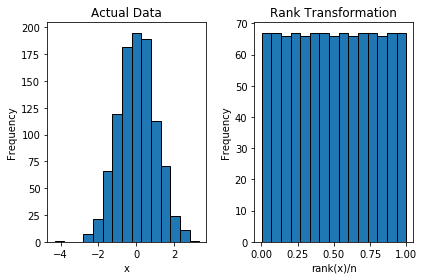

In [30]:
n=1000
np.random.seed(2018)
x=np.random.normal(size=n)
y=stats.rankdata(x)/n

plt.subplot(1,2,1)
plt.hist(x,bins=15,edgecolor='black')
plt.title("Actual Data")
plt.ylabel("Frequency")
plt.xlabel("x")
plt.subplot(1,2,2)
plt.hist(y,edgecolor='black',bins=15)
plt.title("Rank Transformation")
plt.ylabel("Frequency")
plt.xlabel("rank(x)/n")

plt.tight_layout()
plt.show()

### Rank-based Transformation for Normality

Building on the rank transformation, we can apply an inverse normal cumulative distribution function (`cdf`) transform to the rank transformed data to get normally distributed data. The inverse normal CDF 
is calculated using the `ppf()` function, following the formula given on slide of the lecture notes. This is useful because many statistical procedures rely on an assumption of normality, and the analyzed data can always be converted back by reversing the steps taken to transform it from its original distribution to normally distributed.

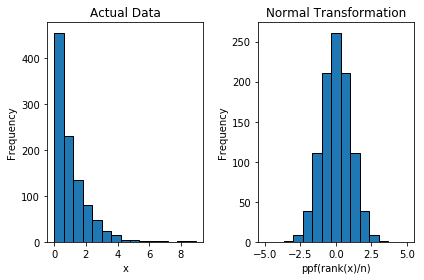

In [31]:
n=1000
np.random.seed(2018)
x=np.random.exponential(size=n)
y=stats.norm.ppf(stats.rankdata(x)/n)

plt.subplot(1,2,1)
plt.hist(x,bins=15,edgecolor='black') # very skewed
plt.title("Actual Data")
plt.ylabel("Frequency")
plt.xlabel("x")
plt.subplot(1,2,2)
plt.hist(y,edgecolor='black',range=(-5,5),bins=15)
plt.title("Normal Transformation")
plt.ylabel("Frequency")
plt.xlabel("ppf(rank(x)/n)")

plt.tight_layout()
plt.show()

## Transforming Skewed Proportions

 - Power transformations will not work for proportions (including percentages and rates) if the data values approach the boundaries of 0 and 1
 - Skewed Proportion Distributions 
    - logit transformation
    - probit transformation
 - Logit Transformation 
    - removes the boundaries of the scale
    - spreads out the tails of the distribution and
    - makes the distribution symmetric about 0 rather than 0.5
    - nearly linear for proportions between .20 and .80
    - alues close to 0 and 1 are spread out at an increasing rate
 - Probit Transformation 
    - if their scales are equated then logit and probit are almost indistinguishable

In [32]:
p=np.arange(0,1.1,0.1)
y=scipy.special.logit(p)

Text(0.5,1,'Logit Transoformations of Proportiona')

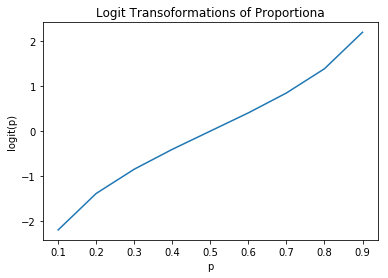

In [33]:
plt.plot(p,y)
plt.xlabel("p")
plt.ylabel("logit(p)")
plt.title("Logit Transoformations of Proportiona")